# Predicting Breast Cancer Survival Using Artificial Neural Networks

### Introduction:
Breast cancer is a leading cause of mortality among women, making survival prediction critical for personalized treatment. This project uses patient data—such as tumor stage, hormone receptor status, and protein expression levels—to build a classification model with an Artificial Neural Network (ANN) for predicting survival post-surgery. Leveraging ANN's capabilities, we aim to contribute to early diagnosis and individualized care, enhancing patient outcomes.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tlf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
df= pd.read_csv("BRCA.csv")

In [4]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [5]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [6]:
df.shape

(341, 16)

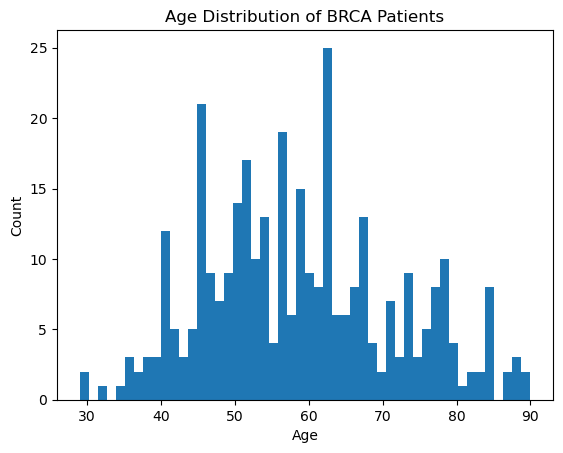

In [7]:
df['Age'].hist(bins = 50, grid = False)
plt.xlabel(xlabel = "Age")
plt.ylabel(ylabel = "Count")
plt.title("Age Distribution of BRCA Patients")
plt.show()

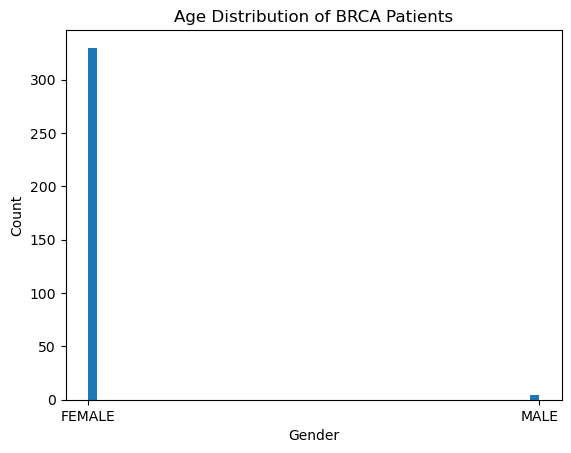

In [8]:
df['Gender'].hist(bins = 50, grid = False)
plt.xlabel(xlabel = "Gender")
plt.ylabel(ylabel = "Count")
plt.title("Age Distribution of BRCA Patients")
plt.show()

+ The age distribution in the dataset is predominantly normal, with a slight right skew. The majority of the population falls within the 45-55 age range.

In [10]:
# missing values
df = df.dropna()

In [11]:
# Map categorical values to numerical values for ER, PR, and HER2 status
df["ER status"] = df["ER status"].map({"Negative": 0, "Positive": 1})
df["PR status"] = df["PR status"].map({"Negative": 0, "Positive": 1})
df["HER2 status"] = df["HER2 status"].map({"Negative": 0, "Positive": 1})
df["Patient_Status"]= df["Patient_Status"].map({"Dead":0 , "Alive": 1})

In [12]:
# Convert categorical variables (Tumor_Stage, Histology, Surgery_type) into dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Tumour_Stage', 'Histology', 'Surgery_type', "Gender"])

In [13]:
# Convert the 'DateofSurgery' and 'DateofLast_Visit' columns to datetime format
df["Date_of_Surgery"] = pd.to_datetime(df["Date_of_Surgery"], format='%d-%b-%y')
df["Date_of_Last_Visit"] = pd.to_datetime(df["Date_of_Last_Visit"], format='%d-%b-%y')

# Calculate the difference between 'DateofLast_Visit' and 'DateofSurgery' and store it in a new column 'time_surgery'
df["time_surgery"] = (df["Date_of_Last_Visit"] - df["Date_of_Surgery"]).dt.days

print(df[["Date_of_Surgery", "Date_of_Last_Visit", "time_surgery"]].head())

  Date_of_Surgery Date_of_Last_Visit  time_surgery
0      2017-01-15         2017-06-19           155
1      2017-04-26         2018-11-09           562
2      2017-09-08         2018-06-09           274
3      2017-01-25         2017-07-12           168
4      2017-05-06         2019-06-27           782


In [14]:
# standardizaiton for units
numerical_columns = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4','time_surgery']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [15]:
x =df.drop(["Patient_ID", "Patient_Status","Date_of_Surgery","Date_of_Last_Visit"], axis=1)
y= df["Patient_Status"]

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 255), (1, 255)]


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size= .30 , random_state= 42)

In [18]:
model= Sequential()
model.add(Dense(120, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(.20))
model.add(Dense(32, activation="relu"))
model.add(Dropout(.20))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer = "adam",
              loss= "sparse_categorical_crossentropy",
              metrics= ["accuracy"]
              )


In [19]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=65)

Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.5246 - loss: 0.7039 - val_accuracy: 0.5948 - val_loss: 0.6868
Epoch 2/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4989 - loss: 0.6930 - val_accuracy: 0.5817 - val_loss: 0.6771
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6070 - loss: 0.6705 - val_accuracy: 0.6275 - val_loss: 0.6689
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5747 - loss: 0.6781 - val_accuracy: 0.6340 - val_loss: 0.6629
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6440 - loss: 0.6521 - val_accuracy: 0.6209 - val_loss: 0.6592
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6384 - loss: 0.6512 - val_accuracy: 0.6209 - val_loss: 0.6545
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6764 - loss: 0.6309 - val_accuracy: 0.6209 - val_loss: 0.6500
Epoch 8/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7042 - loss: 0.6340 - val_accuracy: 0.6209 - val_loss: 0.6465

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           2,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,030 (148.56 KB)

 Trainable params: 12,676 (49.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,354 (99.04 KB)

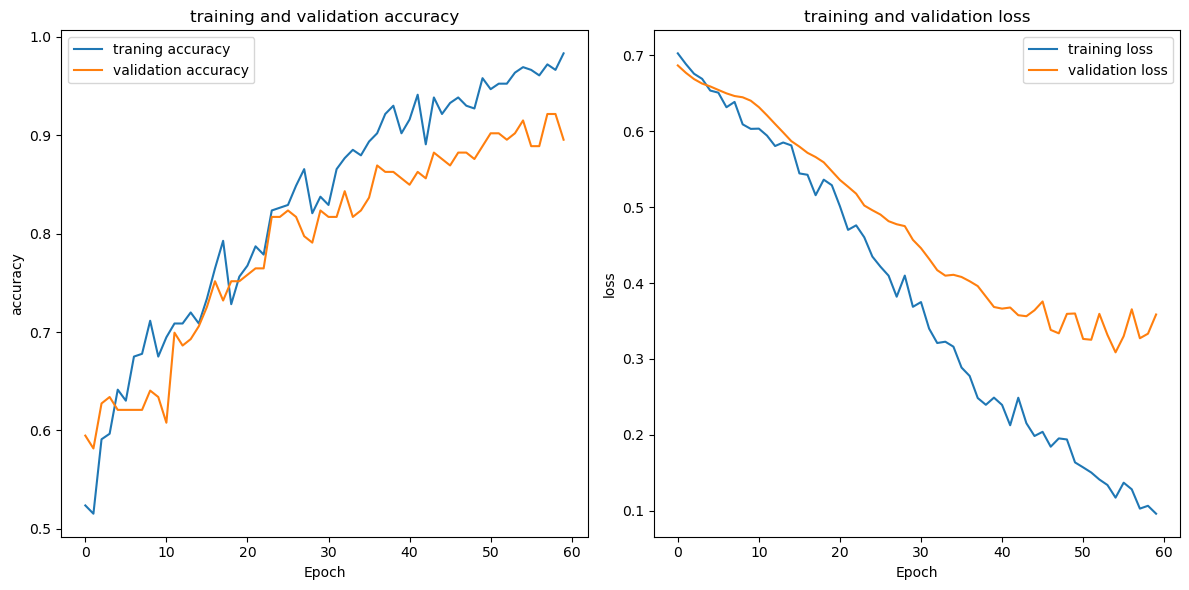

In [21]:
# Training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1
plt.plot(history.history["accuracy"], label="traning accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.title("training and validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)  
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title("training and validation loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()

plt.tight_layout()
plt.show()


### Conclusion

This study developed a machine learning model to predict the survival of breast cancer patients. By the end of training, the model achieved a validation accuracy of 98%, demonstrating high effectiveness in survival prediction. These results suggest that the model could be a valuable tool for predicting breast cancer outcomes. With AI integration in healthcare, models like this can contribute to early diagnosis and improved treatment planning.
